# Importing Data / Preprocessing

In [1]:
# Connecting to Drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn import preprocessing

In [3]:
import re
import string
import gzip
import nltk
nltk.download("stopwords")
from nltk.corpus import stopwords
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as pyplot
from pandas import option_context
from sklearn import preprocessing
from tabulate import tabulate
from sklearn.preprocessing import LabelEncoder
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.cluster import KMeans
from sklearn.ensemble  import RandomForestClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import f1_score,accuracy_score,recall_score,precision_score,classification_report,confusion_matrix
from IPython.core.interactiveshell import InteractiveShell  
InteractiveShell.ast_node_interactivity = "all"
import warnings
warnings.filterwarnings('ignore')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
def parse(path):
  g = gzip.open(path, 'rb')
  for l in g:
    yield eval(l)

def getDF(path):
  i = 0
  df = {}
  for d in parse(path):
    df[i] = d
    i += 1
  return pd.DataFrame.from_dict(df, orient='index')

In [ ]:
# Reading Data
meta_health = getDF('/content/drive/MyDrive/Data Files/meta_Health_and_Personal_Care.json.gz')
meta_health.head(3)

,asin,description,title,imUrl,related,salesRank,categories,price,brand
0,0077614992,This is an example product description.,Principles of Mgmt + Oper-CSUF Custom C,http://ecx.images-amazon.com/images/I/51G%2BRq...,"{'also_bought': ['0471730726', '0132834871', '...",{'Health & Personal Care': 168429},[[Health & Personal Care]],NaN,NaN
1,0615208479,By now we all know the benefits of exercise fo...,Brain Fitness Exercises Software,http://ecx.images-amazon.com/images/I/41kbZB04...,NaN,{'Health & Personal Care': 1346973},"[[Health & Personal Care, Personal Care]]",NaN,NaN
2,0615269990,What's wrong with your patient?Do all the symp...,Occam's Razor,http://ecx.images-amazon.com/images/I/51fH-ABe...,"{'also_bought': ['1935660152', '0071743979', '...",{'Toys & Games': 110575},"[[Health & Personal Care, Personal Care, Shavi...",34.99,NaN


In [ ]:
# Reading Data
review_health = getDF('/content/drive/MyDrive/Data Files/reviews_Health_and_Personal_Care.json.gz')
review_health.head(3)

,reviewerID,asin,reviewerName,helpful,reviewText,overall,summary,unixReviewTime,reviewTime
0,ARMDSTEI0Z7YW,0077614992,dodo,"[0, 0]",This book was a requirement for a college clas...,5.0,great,1360886400,"02 15, 2013"
1,A3FYN0SZYWN74,0615208479,Marilyn Mitzel,"[0, 0]",This is a great gift for anyone who wants to h...,5.0,AMAZING HOW QUICKLY IT WORKS!,1228089600,"12 1, 2008"
2,A2J0WRZSAAHUAP,0615269990,icu-rn,"[0, 0]",Very helpful in learning about different disea...,5.0,Must have,1396742400,"04 6, 2014"


In [ ]:
# Merging Data
merge_data = pd.merge(review_health,meta_health,on='asin',how='inner')

In [ ]:
# Data Head
merge_data.head(2)

,reviewerID,asin,reviewerName,helpful,reviewText,overall,summary,unixReviewTime,reviewTime,description,title,imUrl,related,salesRank,categories,price,brand
0,ARMDSTEI0Z7YW,0077614992,dodo,"[0, 0]",This book was a requirement for a college clas...,5.0,great,1360886400,"02 15, 2013",This is an example product description.,Principles of Mgmt + Oper-CSUF Custom C,http://ecx.images-amazon.com/images/I/51G%2BRq...,"{'also_bought': ['0471730726', '0132834871', '...",{'Health & Personal Care': 168429},[[Health & Personal Care]],NaN,NaN
1,A3FYN0SZYWN74,0615208479,Marilyn Mitzel,"[0, 0]",This is a great gift for anyone who wants to h...,5.0,AMAZING HOW QUICKLY IT WORKS!,1228089600,"12 1, 2008",By now we all know the benefits of exercise fo...,Brain Fitness Exercises Software,http://ecx.images-amazon.com/images/I/41kbZB04...,NaN,{'Health & Personal Care': 1346973},"[[Health & Personal Care, Personal Care]]",NaN,NaN


In [ ]:
# Converting Date Format
merge_data['reviewTime'] = pd.to_datetime(merge_data['reviewTime'])

In [ ]:
# Sorting the Data on Time Frame
merge_data = merge_data.sort_values('reviewTime')

In [ ]:
# Setting Review Date as Index
merge_data = merge_data.set_index(merge_data['reviewTime'])

In [ ]:
# Checking Null Values
merge_data.isnull().sum()

reviewerID             0
asin                   0
reviewerName       31653
helpful                0
reviewText             0
overall                0
summary                0
unixReviewTime         0
reviewTime             0
description       119905
title              11411
imUrl               5278
related           111195
salesRank         141681
categories             0
price             314472
brand             904550
dtype: int64

In [ ]:
# Data Shape
merge_data.shape

(2982326, 17)

In [ ]:
# Converting Categories Nested List into List
merge_data['categories'] = [i[0] for i in merge_data['categories']]

In [ ]:
# Converting Rating Float to Int
merge_data['overall'] = merge_data['overall'].astype('int')

In [ ]:
# Info
merge_data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2982326 entries, 1998-07-26 to 2014-07-23
Data columns (total 17 columns):
 #   Column          Dtype         
---  ------          -----         
 0   reviewerID      object        
 1   asin            object        
 2   reviewerName    object        
 3   helpful         object        
 4   reviewText      object        
 5   overall         int64         
 6   summary         object        
 7   unixReviewTime  int64         
 8   reviewTime      datetime64[ns]
 9   description     object        
 10  title           object        
 11  imUrl           object        
 12  related         object        
 13  salesRank       object        
 14  categories      object        
 15  price           float64       
 16  brand           object        
dtypes: datetime64[ns](1), float64(1), int64(2), object(13)
memory usage: 409.6+ MB


In [ ]:
# Filtering the Records based on Good or Bad
merge_data.insert(6,'sentiment',np.nan)

In [ ]:
# Adding Sentiment Columns
lst = []
for i in merge_data['overall']:
  if i > 3:
    lst.append('Positive')
  elif i == 3:
    lst.append('Neutral')
  else:
    lst.append('Negative')

merge_data['sentiment'] = lst

In [ ]:
# Filtering the Records based on Helpful or Not
merge_data.insert(4,'help_per',np.nan)

In [ ]:
# Adding Values to the Columns helpful percentage
merge_data['help_per'] = [0 if i[1]==0 else round(i[0]/i[1]*100,2) for i in merge_data['helpful']]

In [ ]:
# Columns
merge_data.columns

Index(['reviewerID', 'asin', 'reviewerName', 'helpful', 'help_per',
       'reviewText', 'overall', 'sentiment', 'summary', 'unixReviewTime',
       'reviewTime', 'description', 'title', 'imUrl', 'related', 'salesRank',
       'categories', 'price', 'brand'],
      dtype='object')

In [ ]:
# Describe
merge_data.describe()

,help_per,overall,unixReviewTime,price
count,2.982326e+06,2.982326e+06,2.982326e+06,2.667854e+06
mean,3.307806e+01,4.107974e+00,1.358166e+09,2.929901e+01
std,4.361229e+01,1.336448e+00,5.000698e+07,4.011675e+01
min,0.000000e+00,1.000000e+00,9.014112e+08,1.000000e-02
25%,0.000000e+00,4.000000e+00,1.347667e+09,1.013000e+01
50%,0.000000e+00,5.000000e+00,1.372810e+09,1.884000e+01
75%,8.750000e+01,5.000000e+00,1.391472e+09,3.321000e+01
max,2.000000e+02,5.000000e+00,1.406074e+09,9.999900e+02


In [ ]:
# Info
merge_data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2982326 entries, 1998-07-26 to 2014-07-23
Data columns (total 19 columns):
 #   Column          Dtype         
---  ------          -----         
 0   reviewerID      object        
 1   asin            object        
 2   reviewerName    object        
 3   helpful         object        
 4   help_per        float64       
 5   reviewText      object        
 6   overall         int64         
 7   sentiment       object        
 8   summary         object        
 9   unixReviewTime  int64         
 10  reviewTime      datetime64[ns]
 11  description     object        
 12  title           object        
 13  imUrl           object        
 14  related         object        
 15  salesRank       object        
 16  categories      object        
 17  price           float64       
 18  brand           object        
dtypes: datetime64[ns](1), float64(2), int64(2), object(14)
memory usage: 455.1+ MB


In [ ]:
# Shape
merge_data.shape

(2982326, 19)

In [ ]:
# Copying Data Frame
data = merge_data.copy()

In [ ]:
# Dropping Null Values
merge_data.dropna(inplace=True)

In [ ]:
# Data Shape 
merge_data.shape

(1916495, 19)

In [ ]:
# Null Values Check
merge_data.isnull().sum()

reviewerID        0
asin              0
reviewerName      0
helpful           0
help_per          0
reviewText        0
overall           0
sentiment         0
summary           0
unixReviewTime    0
reviewTime        0
description       0
title             0
imUrl             0
related           0
salesRank         0
categories        0
price             0
brand             0
dtype: int64

# NLP Text Classification

In [ ]:
# Sampling Data
group_s=merge_data.groupby(["sentiment"])
sentiments=merge_data.sentiment.unique()
sample_df=pd.DataFrame()
for s in sentiments:
  s_data=group_s.get_group(s)
  sample_data=s_data.sample(frac=0.32,random_state=42)
  sample_df=sample_df.append(sample_data,ignore_index=True)

In [ ]:
# COnverting Data to CSV
sample_df.to_csv('/content/drive/MyDrive/Data Files/nlp_data_health.csv')

In [4]:
# Reading Data 
sample_df = pd.read_csv('/content/drive/MyDrive/Data Files/nlp_data_health.csv')

In [5]:
# Data Shape of Sampled Data
sample_df.shape

(613279, 20)

In [6]:
# Creating Data Frame
data_1 = pd.DataFrame()
data_1["review"]=sample_df["reviewText"]
data_1["sentiment"]=sample_df["sentiment"]

In [7]:
# Displaying Data Frame
with option_context('display.max_colwidth',200):
    display(data_1.head(5))

,review,sentiment
0,"It's done very well. It's strong and well made. The only one issue I had was a scare I had, I picked the bucket up by the handle and the handle slipped off. I caught it before anything spilled....",Positive
1,"Finally I got the hair all over my body shaved, it's just what I want, my girl friend and boy friend all like it, lol!",Positive
2,This tape does not leave any tape residue on your skin. So much better for long term use on delicate sensitive skin. I love it. I have been using it for 1 year this time and for 2 yrs in 2002. I h...,Positive
3,"I've never waxed myself before, but this works great! Putting on a thin layer, rubbing quickly a few times in the direction of growth, and then rapidly pulling the strip off makes it work perfectl...",Positive
4,"I take a pill about 30 minutes before I want to go to sleep, and it doesn't take long before I am yawning and ready to crawl under the covers. If you have problems sleeping at night, I would encou...",Positive


In [8]:
# Defining Function for Cleaning
def cleaning(text):
    '''Make text lowercase, remove text in square brackets,remove links,remove punctuation
    and remove words containing numbers.'''
    text = str(text).lower()
    text = re.sub('\[.*?\]', '', text)
    text = re.sub('https?://\S+|www\.\S+', '', text)
    text = re.sub('<.*?>+', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\n', '', text)
    text = re.sub('\w*\d\w*', '', text)
    return text

In [9]:
# Cleaning of Data
data_1['cleaned_review']=data_1['review'].apply(cleaning)
data_1['cleaned_review']

0         its done very well  its strong and well made  ...
1         finally i got the hair all over my body shaved...
2         this tape does not leave any tape residue on y...
3         ive never waxed myself before but this works g...
4         i take a pill about  minutes before i want to ...
                                ...                        
613274    its not a very effective cleaner compared to o...
613275    i started taking thyroid energy in november   ...
613276    even though the head looks like its made of me...
613277    ive never reviewed anything online before but ...
613278    it definitely helped get rid of water weight b...
Name: cleaned_review, Length: 613279, dtype: object

In [10]:
# Stopwords Treatment
import nltk
nltk.download("stopwords")
from nltk.corpus import stopwords

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [11]:
# Loading Stopwords
sw = stopwords.words('english')

In [12]:
# Defining Function for Stopwords
def stop_treat(data):
  flst = []
  for i in data:
    lst = []
    for j in i.split(' '):
      if j not in sw:
        lst.append(j)
    flst.append(' '.join(lst))
  return(flst)

In [13]:
# Stopwords Treatment
data_1['cleaned_review']=stop_treat(data_1['cleaned_review'])
data_1['cleaned_review']

0         done well  strong well made  one issue scare p...
1         finally got hair body shaved want girl friend ...
2         tape leave tape residue skin much better long ...
3         ive never waxed works great putting thin layer...
4         take pill  minutes want go sleep doesnt take l...
                                ...                        
613274    effective cleaner compared others ive used  ha...
613275    started taking thyroid energy november   first...
613276    even though head looks like made metal im pret...
613277    ive never reviewed anything online thing bad f...
613278    definitely helped get rid water weight didnt w...
Name: cleaned_review, Length: 613279, dtype: object

In [14]:
# Dropping Review Column
data_1.drop(["review"],axis=1,inplace=True)

In [15]:
# Displaying Data
with option_context('display.max_colwidth',200):
    display(data_1.head(5))

,sentiment,cleaned_review
0,Positive,done well strong well made one issue scare picked bucket handle handle slipped caught anything spilled think could make better get make sure pick bucket
1,Positive,finally got hair body shaved want girl friend boy friend like lol
2,Positive,tape leave tape residue skin much better long term use delicate sensitive skin love using year time yrs tried every kind bomb good deal
3,Positive,ive never waxed works great putting thin layer rubbing quickly times direction growth rapidly pulling strip makes work perfectly still little pain course certainly bearable theres slight learning ...
4,Positive,take pill minutes want go sleep doesnt take long yawning ready crawl covers problems sleeping night would encourage anyone everyone try melatonin work everyone dollars nearly years supply worth t...


In [16]:
# Converting Category to Numerical
labelencoder=preprocessing.LabelEncoder()
data_1["sentiment"]=labelencoder.fit_transform(data_1["sentiment"])

In [17]:
# Converting to Unicode
data_1["cleaned_review"] = data_1["cleaned_review"].astype('U').values

In [18]:
# Splitting Dependent and Independent Data
x=data_1["cleaned_review"]
y=data_1["sentiment"]

In [19]:
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer

In [20]:
# Splitting Train and Test Data
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30,random_state=42)

In [21]:
# Length of Train and Test
print(f"length of x_train ={len(x_train)},length of y_train ={len(y_train)}")
print(f"length of x_test ={len(x_test)},length of y_test ={len(y_test)}")

length of x_train =429295,length of y_train =429295
length of x_test =183984,length of y_test =183984


In [22]:
# Vectorizing Data
tvectorizer = TfidfVectorizer(ngram_range=(2,2))

In [23]:
# Data Vectorization
x_train1 = tvectorizer.fit_transform(x_train)
x_test1 = tvectorizer.transform(x_test)  

In [24]:
# SMOTE 
sm = SMOTE(random_state=25)
x_res, y_res = sm.fit_resample(x_train1, y_train)

In [25]:
from sklearn.linear_model import LogisticRegression
import warnings
warnings.filterwarnings('ignore')

In [26]:
# Defining Function for Evaluation
def evaluation_metrics(y_test,y_pred):
    print("--------------------------------------------confusion matrix -----------------------------------------")
    cm=confusion_matrix(y_test,y_pred)
    print(cm)
    print()
    print("--------------------------------------------classification report -----------------------------------------")
    cr=classification_report(y_test,y_pred)
    print(cr)
    acc=accuracy_score(y_test,y_pred)
    rec=recall_score(y_test,y_pred,average="weighted")
    f1=f1_score(y_test,y_pred,average="weighted")
    pre=precision_score(y_test,y_pred,average="weighted")
    print('The Accuracy score is : ',round(acc*100,1),'%')
    print('The Precission score is : ',round(pre*100,1),'%')
    print('The F1_score score is : ',round(f1*100,1),'%')
    print('The Recall score is : ',round(rec*100,1),'%')

In [27]:
# Logistic Regression Model Building
lr=LogisticRegression()
lr.fit(x_res, y_res)

LogisticRegression()

In [28]:
# LR Model Prediction
pred_lr = lr.predict(x_test1)

In [29]:
# Evaluation
evaluation_metrics(y_test,pred_lr)

--------------------------------------------confusion matrix -----------------------------------------
[[ 18684   4107   4850]
 [  3690   5345   5965]
 [  8889  11852 120602]]

--------------------------------------------classification report -----------------------------------------
              precision    recall  f1-score   support

           0       0.60      0.68      0.63     27641
           1       0.25      0.36      0.29     15000
           2       0.92      0.85      0.88    141343

    accuracy                           0.79    183984
   macro avg       0.59      0.63      0.60    183984
weighted avg       0.82      0.79      0.80    183984

The Accuracy score is :  78.6 %
The Precission score is :  81.5 %
The F1_score score is :  79.9 %
The Recall score is :  78.6 %


In [30]:
# Multinomial Model Building
mb = MultinomialNB()
mb.fit(x_res, y_res)

MultinomialNB()

In [31]:
# MB Model Prediction
pred_mb = mb.predict(x_test1)

In [33]:
# Evaluation
evaluation_metrics(y_test,pred_mb)

--------------------------------------------confusion matrix -----------------------------------------
[[ 16152   2843   8646]
 [  2718   3340   8942]
 [  3328   3736 134279]]

--------------------------------------------classification report -----------------------------------------
              precision    recall  f1-score   support

           0       0.73      0.58      0.65     27641
           1       0.34      0.22      0.27     15000
           2       0.88      0.95      0.92    141343

    accuracy                           0.84    183984
   macro avg       0.65      0.59      0.61    183984
weighted avg       0.82      0.84      0.82    183984

The Accuracy score is :  83.6 %
The Precission score is :  81.6 %
The F1_score score is :  82.3 %
The Recall score is :  83.6 %


In [34]:
from sklearn.svm import LinearSVC

In [35]:
# SVM Model Building
svm = LinearSVC()
svm.fit(x_res, y_res)

LinearSVC()

In [36]:
# SVM Model Prediction
pred_svm = svm.predict(x_test1)

In [37]:
# Evaluation
evaluation_metrics(y_test,pred_svm)

--------------------------------------------confusion matrix -----------------------------------------
[[ 18354   3036   6251]
 [  3601   3827   7572]
 [  6679   7425 127239]]

--------------------------------------------classification report -----------------------------------------
              precision    recall  f1-score   support

           0       0.64      0.66      0.65     27641
           1       0.27      0.26      0.26     15000
           2       0.90      0.90      0.90    141343

    accuracy                           0.81    183984
   macro avg       0.60      0.61      0.60    183984
weighted avg       0.81      0.81      0.81    183984

The Accuracy score is :  81.2 %
The Precission score is :  81.1 %
The F1_score score is :  81.2 %
The Recall score is :  81.2 %


In [38]:
# Count Vectorizer
cvectorizer = CountVectorizer(ngram_range=(2,2))

In [39]:
# Vectorizing Data
x_train1 = cvectorizer.fit_transform(x_train)
x_test1 = cvectorizer.transform(x_test)

In [40]:
# LR Model Building
lr_1 = LogisticRegression()
lr_1.fit(x_train1,y_train)

LogisticRegression()

In [41]:
# Prediction
pred_lr_1 = lr_1.predict(x_test1)

In [42]:
# Evaluation
evaluation_metrics(y_test,pred_lr)

--------------------------------------------confusion matrix -----------------------------------------
[[ 18684   4107   4850]
 [  3690   5345   5965]
 [  8889  11852 120602]]

--------------------------------------------classification report -----------------------------------------
              precision    recall  f1-score   support

           0       0.60      0.68      0.63     27641
           1       0.25      0.36      0.29     15000
           2       0.92      0.85      0.88    141343

    accuracy                           0.79    183984
   macro avg       0.59      0.63      0.60    183984
weighted avg       0.82      0.79      0.80    183984

The Accuracy score is :  78.6 %
The Precission score is :  81.5 %
The F1_score score is :  79.9 %
The Recall score is :  78.6 %


In [43]:
# Multinomial NB Model Building
mb_1 = MultinomialNB()
mb_1.fit(x_train1,y_train)

MultinomialNB()

In [44]:
# Prediction
pred_mb_1 = mb_1.predict(x_test1)

In [45]:
# Evaluation
evaluation_metrics(y_test,pred_mb_1)

--------------------------------------------confusion matrix -----------------------------------------
[[  8459     71  19111]
 [   872     87  14041]
 [   556     57 140730]]

--------------------------------------------classification report -----------------------------------------
              precision    recall  f1-score   support

           0       0.86      0.31      0.45     27641
           1       0.40      0.01      0.01     15000
           2       0.81      1.00      0.89    141343

    accuracy                           0.81    183984
   macro avg       0.69      0.44      0.45    183984
weighted avg       0.78      0.81      0.75    183984

The Accuracy score is :  81.1 %
The Precission score is :  78.3 %
The F1_score score is :  75.5 %
The Recall score is :  81.1 %


In [46]:
# SVM Model Building
svm_1 = LinearSVC()
svm_1.fit(x_train1,y_train)

LinearSVC()

In [47]:
# Prediction
pred_svm_1 = svm_1.predict(x_test1)

In [48]:
# Evaluation
evaluation_metrics(y_test,pred_svm_1)

--------------------------------------------confusion matrix -----------------------------------------
[[ 16075   1782   9784]
 [  3177   2459   9364]
 [  3895   2787 134661]]

--------------------------------------------classification report -----------------------------------------
              precision    recall  f1-score   support

           0       0.69      0.58      0.63     27641
           1       0.35      0.16      0.22     15000
           2       0.88      0.95      0.91    141343

    accuracy                           0.83    183984
   macro avg       0.64      0.57      0.59    183984
weighted avg       0.81      0.83      0.81    183984

The Accuracy score is :  83.3 %
The Precission score is :  80.5 %
The F1_score score is :  81.4 %
The Recall score is :  83.3 %


# Customer Segmentation

In [ ]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_samples, silhouette_score
import matplotlib.cm as cm
import datetime as dt
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

In [ ]:
# Copying Data
df_2 = data.copy()

In [ ]:
# Columns
df_2.columns

Index(['reviewerID', 'asin', 'reviewerName', 'helpful', 'help_per',
       'reviewText', 'overall', 'sentiment', 'summary', 'unixReviewTime',
       'reviewTime', 'description', 'title', 'imUrl', 'related', 'salesRank',
       'categories', 'price', 'brand'],
      dtype='object')

In [ ]:
# Columns
df_2.shape

(2982326, 19)

In [ ]:
# Summary
df_2.describe()

,help_per,overall,unixReviewTime,price
count,2.982326e+06,2.982326e+06,2.982326e+06,2.667854e+06
mean,3.307806e+01,4.107974e+00,1.358166e+09,2.929901e+01
std,4.361229e+01,1.336448e+00,5.000698e+07,4.011675e+01
min,0.000000e+00,1.000000e+00,9.014112e+08,1.000000e-02
25%,0.000000e+00,4.000000e+00,1.347667e+09,1.013000e+01
50%,0.000000e+00,5.000000e+00,1.372810e+09,1.884000e+01
75%,8.750000e+01,5.000000e+00,1.391472e+09,3.321000e+01
max,2.000000e+02,5.000000e+00,1.406074e+09,9.999900e+02


In [ ]:
# Creating Date
end_date = dt.datetime(2015, 12, 1)

In [ ]:
# Info
df_2.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2982326 entries, 1998-07-26 to 2014-07-23
Data columns (total 19 columns):
 #   Column          Dtype         
---  ------          -----         
 0   reviewerID      object        
 1   asin            object        
 2   reviewerName    object        
 3   helpful         object        
 4   help_per        float64       
 5   reviewText      object        
 6   overall         int64         
 7   sentiment       object        
 8   summary         object        
 9   unixReviewTime  int64         
 10  reviewTime      datetime64[ns]
 11  description     object        
 12  title           object        
 13  imUrl           object        
 14  related         object        
 15  salesRank       object        
 16  categories      object        
 17  price           float64       
 18  brand           object        
dtypes: datetime64[ns](1), float64(2), int64(2), object(14)
memory usage: 455.1+ MB


In [ ]:
# Grouping the Data for RFM
data_2 = df_2.groupby('reviewerID').agg({'reviewTime': lambda reviewTime: (end_date - reviewTime.max()).days,'asin' : 'nunique', 'price' : 'sum'})

In [ ]:
# Shape of Data
data_2.shape

(1851132, 3)

In [ ]:
# Assigning Columns
data_2.columns = ['recency','frequency','monetary']

In [ ]:
# Data Head
data_2.head()

,recency,frequency,monetary
reviewerID,,,
A0000726154QG4JYYPS1W,628,1,22.95
A000096617D1KX8J1SNO6,774,1,73.78
A000152835L65OOF6JM10,771,1,18.58
A000187635I595IAVSQLH,638,2,11.22
A00024081MYZENMKQF9NC,516,1,6.99


In [ ]:
# Scaling of Data
std = StandardScaler()

scaled_df = std.fit_transform(data_2)

In [ ]:
# Creating DataFrame for Scaled Data

scaled_df = pd.DataFrame(scaled_df,columns=['recency','frequency','monetary'], index=data_2.index)

In [ ]:
# Data Head
scaled_df.head()

,recency,frequency,monetary
reviewerID,,,
A0000726154QG4JYYPS1W,-0.681653,-0.258189,-0.272911
A000096617D1KX8J1SNO6,-0.431311,-0.258189,0.446752
A000152835L65OOF6JM10,-0.436455,-0.258189,-0.334782
A000187635I595IAVSQLH,-0.664506,0.164322,-0.438987
A00024081MYZENMKQF9NC,-0.873697,-0.258189,-0.498876


array([0, 0, 0, ..., 0, 0, 0], dtype=int32)

array([1, 1, 1, ..., 1, 1, 1], dtype=int32)

array([0, 0, 0, ..., 0, 0, 1], dtype=int32)

array([0, 0, 0, ..., 0, 0, 1], dtype=int32)

array([0, 0, 0, ..., 0, 0, 1], dtype=int32)

array([1, 1, 1, ..., 1, 1, 4], dtype=int32)

array([0, 0, 0, ..., 0, 0, 3], dtype=int32)

array([0, 0, 0, ..., 0, 0, 1], dtype=int32)

array([5, 2, 5, ..., 5, 5, 3], dtype=int32)

array([3, 3, 3, ..., 3, 7, 1], dtype=int32)

<Figure size 864x432 with 0 Axes>

Text(0.5, 0, 'Cluster (K)')

Text(0, 0.5, 'Error (Distortions)')

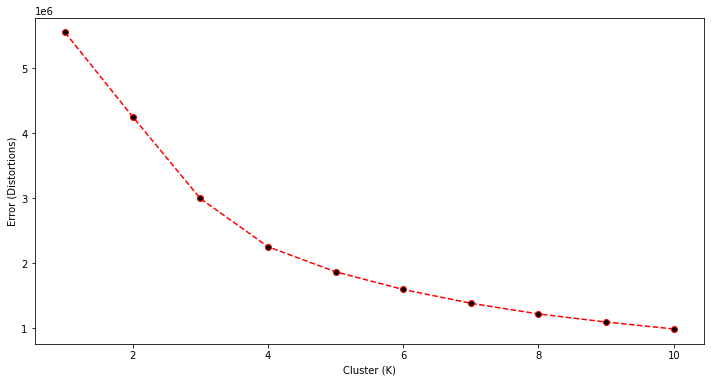

In [ ]:
# Elbow Method for Finding Best Cluster

error = []
for i in range(1,11):
    km = KMeans(n_clusters=i,random_state=10)
    km.fit_predict(scaled_df)
    error.append(km.inertia_)
    
plt.figure(figsize=(12,6))
plt.plot(range(1,11),error,marker='o',ls='--',color='red',mfc='black')
plt.xlabel('Cluster (K)')
plt.ylabel('Error (Distortions)')
plt.show()

In [ ]:
# Model Building
model_1 = KMeans(n_clusters=4,random_state=22)

In [ ]:
# Fitting Data
model_1.fit(scaled_df)

KMeans(n_clusters=4, random_state=22)

In [ ]:
# Centroids
centroids = model_1.cluster_centers_
centroids_df = pd.DataFrame(centroids,columns=list(scaled_df))
centroids_df

,recency,frequency,monetary
0,-0.404032,1.547385,2.392711
1,-0.330126,-0.106037,-0.166799
2,-0.783408,17.847422,13.191699
3,2.017810,-0.201537,-0.177650


In [ ]:
# Cluster Labels
label_df = pd.DataFrame(model_1.labels_,columns=['labels'])
label_df.head()

,labels
0,1
1,1
2,1
3,1
4,1


In [ ]:
# Adding Labels to Data Frame
scaled_df['labels'] = label_df['labels'].values

In [ ]:
# Data Head
scaled_df.head()

,recency,frequency,monetary,labels
reviewerID,,,,
A0000726154QG4JYYPS1W,-0.681653,-0.258189,-0.272911,1
A000096617D1KX8J1SNO6,-0.431311,-0.258189,0.446752,1
A000152835L65OOF6JM10,-0.436455,-0.258189,-0.334782,1
A000187635I595IAVSQLH,-0.664506,0.164322,-0.438987,1
A00024081MYZENMKQF9NC,-0.873697,-0.258189,-0.498876,1


In [ ]:
# Replacing Names of Clusters
scaled_df['labels'] = scaled_df['labels'].replace({0:'Promising',1:'Need-Attention',2:'Best-Customer',3:'Churn-Out'})

<Figure size 576x576 with 0 Axes>

Text(0.5, 1.0, 'Recency VS Frequency')

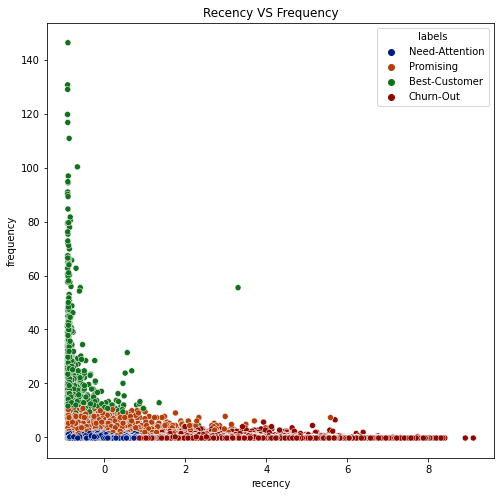

In [ ]:
# Recency VS Frequency
plt.figure(figsize=(8,8))
sb.scatterplot(x ='recency',y = 'frequency',data = scaled_df, hue='labels', palette='dark')
plt.title('Recency VS Frequency')
plt.show()

<Figure size 576x576 with 0 Axes>

Text(0.5, 1.0, 'Recency VS Monetary')

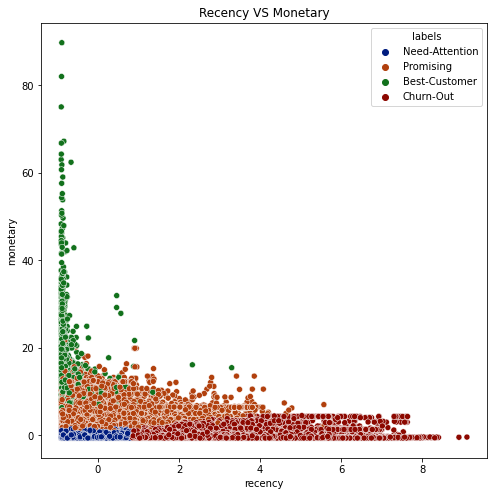

In [ ]:
# Recency VS Monetary
plt.figure(figsize=(8,8))
sb.scatterplot(x ='recency',y = 'monetary',data = scaled_df, hue='labels', palette='dark')
plt.title('Recency VS Monetary')
plt.show()

# Product Recommendation

In [ ]:
from sklearn.decomposition import TruncatedSVD

In [ ]:
# Review Data Head
review_health.head(2)

,reviewerID,asin,reviewerName,helpful,reviewText,overall,summary,unixReviewTime,reviewTime
0,ARMDSTEI0Z7YW,0077614992,dodo,"[0, 0]",This book was a requirement for a college clas...,5.0,great,1360886400,"02 15, 2013"
1,A3FYN0SZYWN74,0615208479,Marilyn Mitzel,"[0, 0]",This is a great gift for anyone who wants to h...,5.0,AMAZING HOW QUICKLY IT WORKS!,1228089600,"12 1, 2008"


In [ ]:
# Rating Details
rating = review_health.overall.unique()
print('Ratings: ',rating)
print('Len of Ratings: ',len(rating))

Ratings:  [5. 2. 4. 1. 3.]
Len of Ratings:  5


In [ ]:
# Reviewer ID Details
id = review_health.reviewerID.unique()
print('Reviewer ID: ',id)
print('Len of Reviewer ID: ',len(id))

Reviewer ID:  ['ARMDSTEI0Z7YW' 'A3FYN0SZYWN74' 'A2J0WRZSAAHUAP' ... 'A1252ETWUJRKVC'
 'A215W0EOUNL81C' 'A2ZFFXGLJUHD76']
Len of Reviewer ID:  1851132


In [ ]:
# Product ID
pro = review_health.asin.unique()
print('Products: ',pro)
print('Len of Products: ',len(pro))

Products:  ['0077614992' '0615208479' '0615269990' ... 'B00LV4480W' 'B00LWTTO0A'
 'B00LYPUPZK']
Len of Products:  252331


In [ ]:
# Product which were sold more 
product_sales = review_health.groupby('asin')['overall'].count().sort_values(ascending=False)
product_sales.head()

asin
B001KXZ808    11365
B0032TNPOE     9338
B0095PZHPE     6788
B00B5H5BGA     5739
B0000U1OCI     5550
Name: overall, dtype: int64

In [ ]:
# Reviewer written more 
rev_sales = review_health.groupby('reviewerID')['overall'].count().sort_values(ascending=False)
rev_sales.head()

reviewerID
A3OXHLG6DIBRW8    348
A1P27BGF8NAI29    311
A3NHUQ33CFH3VM    307
A1UQBFCERIP7VJ    285
A34BZM6S9L7QI4    278
Name: overall, dtype: int64

In [ ]:
# Filtering the Data which has more than 50 items sold
new_df=review_health.groupby("asin").filter(lambda x:x['overall'].count() >= 50)

In [ ]:
# Data Head
new_df.head()

,reviewerID,asin,reviewerName,helpful,reviewText,overall,summary,unixReviewTime,reviewTime
350,A1LFEMC0GGOJ3X,159985130X,7 Zion,"[1, 1]",We recommend the Magnifier. We are able to rea...,4.0,The Lightwedge Lighted Pocket Magnifier meets ...,1353715200,"11 24, 2012"
351,A17NW9ZCVHYBS1,159985130X,Amazon Customer,"[2, 2]",So convenient and small. I love the LED light...,5.0,Convenient!,1279929600,"07 24, 2010"
352,AA5OQ4JR4CCV3,159985130X,"Amazon Customer ""Timmyg""","[1, 1]",Thank god for Amazon. I can never find things ...,5.0,A real lifesaver,1268784000,"03 17, 2010"
353,A1HP21ZBOYRSU,159985130X,Amazonmama,"[2, 2]",I just love this little gadget. Sometimes my r...,5.0,Just what I needed!,1301270400,"03 28, 2011"
354,ALC5GH8CAMAI7,159985130X,AnnN,"[1, 1]",This is a great little gadget to have around. ...,5.0,Handy little gadget,1294185600,"01 5, 2011"


In [ ]:
# Structure of Dataset
new_df.shape

(1731327, 9)

In [ ]:
# Slicing the Data 
new_df_1 = new_df[:100000]

In [ ]:
# Creating Pivot table for Checking Correlation
rating_matrix = new_df_1.pivot_table(index='asin',columns='reviewerID',values='overall',fill_value=0)

In [ ]:
# Data Head
rating_matrix.head()

reviewerID,A0009478CBXKUCALUC7U,A005011233SVRED9Q0VY0,A00878297VYRVLFM06AG,A00951093TVGQWA8EA8DB,A015565634RZNSDLJBE5M,A01811021PZ9TH392P21J,A01818243PXJHK1ZH4HUM,A01836621IAABVFLY7Z80,A01866161OQ1BJPZE8D00,A0193442L7IJXD7HANDM,...,AZZCT56PUXILB,AZZDHYOZS7M3B,AZZGJ2KMWB7R,AZZMINCJAD6JM,AZZMO52V8WZ68,AZZNK89PXD006,AZZTH6DJ0KSIP,AZZV9PDNMCOZW,AZZY3B308E3UB,AZZYO4XQYE89O
asin,,,,,,,,,,,,,,,,,,,,,
159985130X,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1933622865,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3812028492,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6182055936,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7884890364,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
# Structure of Pivot Table
rating_matrix.shape

(575, 94786)

In [ ]:
# Dimensionality Reduction
svd = TruncatedSVD(n_components=20)
dim_data = svd.fit_transform(rating_matrix)

In [ ]:
# Structure of SVD Data
dim_data.shape

(575, 20)

In [ ]:
# Correlation Matrix
corr_matrix = np.corrcoef(dim_data)

In [ ]:
# Shape of Correlation Matrix
corr_matrix.shape

(575, 575)

In [ ]:
# Taking Random Product for Selection
i = rating_matrix.index[350]

In [ ]:
# Displaying the Selected Product ID
i

'B0000Y3F6W'

In [ ]:
# Taking Correlation Matrix Index into List
lst = list(rating_matrix.index)

In [ ]:
# Finding Index of Selected Product ID in List
j = lst.index(i)

In [ ]:
# Selection of Columns of Index of Product ID
correlation_product_ID = corr_matrix[j]

In [ ]:
# Fetching Correlated Product ID's

Recommend = list(rating_matrix.index[correlation_product_ID > 0.8])

Recommend.remove(i) 

In [ ]:
print(Recommend)

['3812028492', 'B00009RB1C', 'B0001ATEJ2']


# Time Series Demand Forecasting

In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose
import matplotlib.pyplot as plt
import pandas as pd
from sklearn import metrics
import statsmodels.api as sm
import math
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

import warnings
warnings.filterwarnings('ignore')

In [ ]:
# Head
data.head(2)

,reviewerID,asin,reviewerName,helpful,help_per,reviewText,overall,sentiment,summary,unixReviewTime,reviewTime,description,title,imUrl,related,salesRank,categories,price,brand
reviewTime,,,,,,,,,,,,,,,,,,,
1998-07-26,A2712X75Y9QI0Q,B0000017QN,Bruce L. Weaver (weav@waveone.net),"[7, 9]",77.78,I have an incurable addition to this music. I ...,5,Positive,Magical Music,901411200,1998-07-26,,Sedona Suite,http://ecx.images-amazon.com/images/I/51riGHIG...,"{'also_bought': ['B0000017RN', 'B00000DBWN', '...",{'Music': 96262},"[CDs & Vinyl, New Age, Meditation]",15.67,"Soundings of the Planet, Healing Music"
1998-11-18,A2NKS9JA830F85,B000000EIC,John A. Wilson,"[16, 17]",94.12,I met and sang with Pat before he made his fir...,5,Positive,wonderful!,911347200,1998-11-18,Vanguard is finally re-issuing this '60s folki...,Patrick Sky,http://ecx.images-amazon.com/images/I/51X6YAX7...,"{'also_bought': ['B000003TK9', 'B000000XF7', '...",{'Music': 44009},"[CDs & Vinyl, Folk, Contemporary Folk]",12.76,NaN


In [ ]:
# Datatypes
data.dtypes

reviewerID                object
asin                      object
reviewerName              object
helpful                   object
help_per                 float64
reviewText                object
overall                    int64
sentiment                 object
summary                   object
unixReviewTime             int64
reviewTime        datetime64[ns]
description               object
title                     object
imUrl                     object
related                   object
salesRank                 object
categories                object
price                    float64
brand                     object
dtype: object

In [ ]:
# Info
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2982326 entries, 1998-07-26 to 2014-07-23
Data columns (total 19 columns):
 #   Column          Dtype         
---  ------          -----         
 0   reviewerID      object        
 1   asin            object        
 2   reviewerName    object        
 3   helpful         object        
 4   help_per        float64       
 5   reviewText      object        
 6   overall         int64         
 7   sentiment       object        
 8   summary         object        
 9   unixReviewTime  int64         
 10  reviewTime      datetime64[ns]
 11  description     object        
 12  title           object        
 13  imUrl           object        
 14  related         object        
 15  salesRank       object        
 16  categories      object        
 17  price           float64       
 18  brand           object        
dtypes: datetime64[ns](1), float64(2), int64(2), object(14)
memory usage: 455.1+ MB


In [ ]:
# Columns
data.columns

Index(['reviewerID', 'asin', 'reviewerName', 'helpful', 'help_per',
       'reviewText', 'overall', 'sentiment', 'summary', 'unixReviewTime',
       'reviewTime', 'description', 'title', 'imUrl', 'related', 'salesRank',
       'categories', 'price', 'brand'],
      dtype='object')

In [ ]:
# Decomposing Data Function
def time_series_comp(data):
  decomp = seasonal_decompose(data,period=12)
  trend = decomp.trend
  season = decomp.seasonal
  irreg = decomp.resid
  return(trend,season,irreg)

In [ ]:
# Function for Time Series Components
def plot_comp(actual,trend,season,irreg,name):

  plt.figure(figsize=(20,20))
  plt.subplot(4,1,1)
  xx = plt.plot(actual,color='black')
  plt.title(name+' Actual Data',fontsize=20,color="maroon",fontweight=20)

  plt.figure(figsize=(20,20))
  plt.subplot(4,1,1)
  yy = plt.plot(trend,color='blue')
  plt.title(name+' Trend',fontsize=20,color="maroon",fontweight=20)

  plt.figure(figsize=(20,20))
  plt.subplot(4,1,1)
  zz = plt.plot(season,color='green')
  plt.title(name+' Seasonality',fontsize=20,color="maroon",fontweight=20)

  plt.figure(figsize=(20,20))
  plt.subplot(4,1,1)
  aa = plt.plot(irreg,color='red')
  plt.title(name+' Irregularity',fontsize=20,color="maroon",fontweight=20)

  return(xx,yy,zz,aa)

In [ ]:
def stationarity_check(data):
  p_value = adfuller(data)[1]
  if p_value < 0.05:
    dec = 'Model was Stationary - Proceed for Model Building'
  else:
    dec = 'Model was not Stationary - Take Differenced Data'
  return(dec)

In [ ]:
def plot(data):
  return(plot_acf(res_data_diff,c='red',lags=12),plot_pacf(res_data_diff,c='red',lags=12));

In [ ]:
def trend_order_iter(p,d,q):
  lst = []
  for i in range(p+1):
    for j in range(q+1):
      lst.append((i,0,j))
  return(lst)

def seasonal_order_iter(P,D,Q,L):
  lst = []
  for i in range(P+1):
    for j in range(Q+1):
      lst.append((i,D,j,L))
  return(lst)

def score_cal_1(t_lst,s_lst,data):
  AIC = []
  BIC = []
  MSE = []
  RMSE = []
  for i in t_lst:
    for j in s_lst:
      model = sm.tsa.statespace.SARIMAX(data,order=i,seasonal_order=j).fit()
      pred = model.fittedvalues
      AIC.append(model.aic)
      BIC.append(model.bic)
      MSE.append(round(metrics.mean_squared_error(data,pred),3))
      RMSE.append(round(metrics.mean_squared_error(data,pred,squared=False),3))
  c = pd.DataFrame({'AIC':AIC,'BIC':BIC,'MSE':MSE,'RMSE':RMSE},index=lst)
  print('Min AIC Order: ',c['AIC'].idxmin())
  print('Min BIC Order: ',c['BIC'].idxmin())
  print('Min MSE Order: ',c['MSE'].idxmin())
  print('Min RMSE Order: ',c['RMSE'].idxmin())

In [ ]:
# Ljung Box Test 
def fit_check(model):
    pvalue = sm.stats.acorr_ljungbox(model.resid,lags=[12],return_df=True)['lb_pvalue'].values
    if pvalue < 0.05:
        print("Bad model - Build the Model Again with differnt Parameters")
    else:
        print("Good model - Proceed for Forecasting")

In [ ]:
def error_check(data,forecast):
    mse = round(metrics.mean_squared_error(data,forecast),3)
    rmse = round(metrics.mean_squared_error(data,forecast,squared=False),3)
    mae = round(metrics.mean_absolute_error(data,forecast),3)
    mape = round(metrics.mean_absolute_percentage_error(data,forecast),3)
    return(mse,rmse,mae,mape)

def print_error(m1_mse, m1_rmse, m1_mae, m1_mape, Model):
    print('Mean Squared Error of '+Model+' is: ',m1_mse)
    print('Root Mean Squared Error of '+Model+' is: ',m1_rmse)
    print('Mean Absolute Error of '+Model+' is: ',m1_mae)
    print('Mean Absolute Percentage Error of '+Model+' is: ',m1_mape)
    
def aic_bic_scores(model):
    AIC = round(model.aic,3)
    BIC = round(model.bic,3)
    return(AIC,BIC)

def print_aic_bic(AIC, BIC, Model):
    print('AIC Score '+Model+' is: ',AIC)
    print('BIC Score '+Model+' is: ',BIC)

## EatSmart Precision Digital Bathroom Scale w/ Extra Large Lighted Display, 400 lb. Capacity and &quot;Step-On&quot; Technology [2014 VERSION] - 10,000+ Reviews EatSmart Guaranteed Accurate

In [ ]:
# Copying Data
df_1 = data.copy()

In [ ]:
# Products which are sold more
df_1.title.value_counts()

EatSmart Precision Digital Bathroom Scale w/ Extra Large Lighted Display, 400 lb. Capacity and &quot;Step-On&quot; Technology [2014 VERSION] - 10,000+ Reviews EatSmart Guaranteed Accurate    11365
Eatsmart Precision Plus Digital Bathroom Scale with Ultra Wide Platform and Step-on Technology, 440-Pounds                                                                                      9338
Fitbit One Wireless Activity Plus Sleep Tracker, Black                                                                                                                                          6788
NatureWise Garcinia Cambogia Extract Natural Appetite Suppressant and Weight Loss Supplement, 180 Count, 500mg (packaging may vary)                                                             5739
Omron HJ-112 Digital Pocket Pedometer                                                                                                                                                           5550
               

In [ ]:
# Mask the Data
mask = (df_1['reviewTime'] > '2008-1-1') & (df_1['reviewTime'] <= '2013-12-31')
df_1 = df_1.loc[mask]

In [ ]:
# Data Filtering
data_1 = df_1.loc[df_1.title == 'EatSmart Precision Digital Bathroom Scale w/ Extra Large Lighted Display, 400 lb. Capacity and &quot;Step-On&quot; Technology [2014 VERSION] - 10,000+ Reviews EatSmart Guaranteed Accurate','title']

In [ ]:
# Resampling the Data
res_data = data_1.resample('M').count()

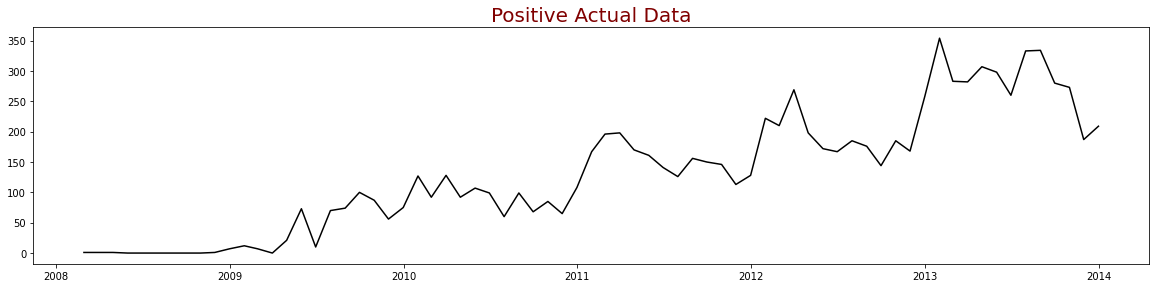

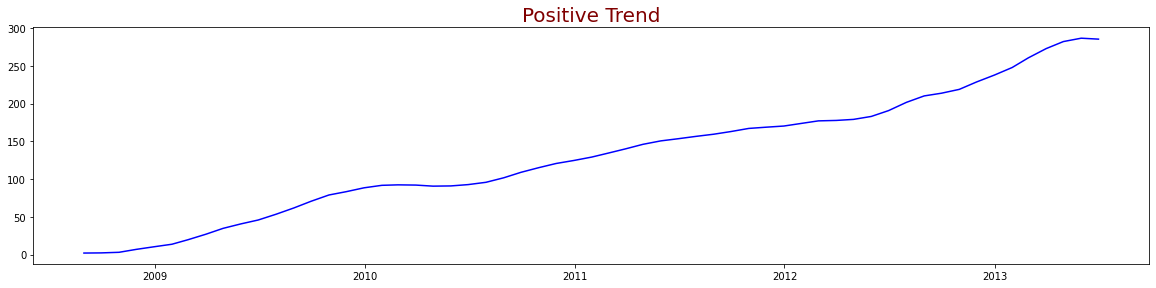

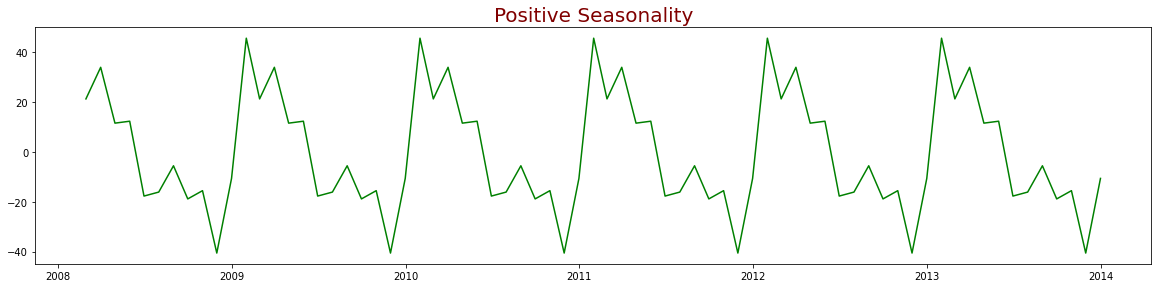

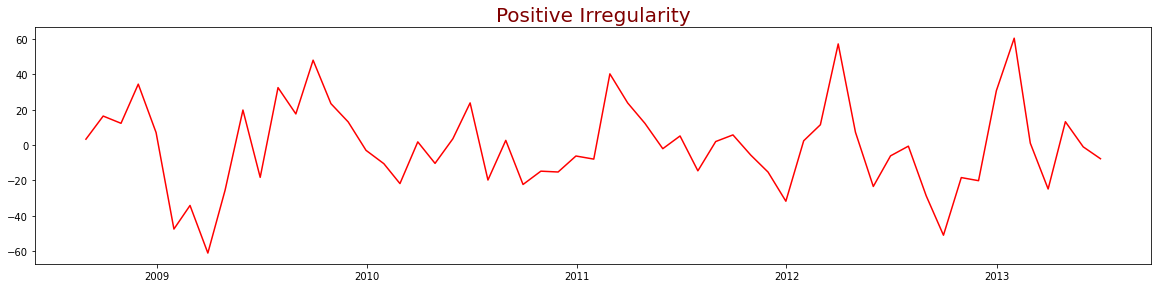

In [ ]:
# Positive Time Series Data Components
trend, season, irreg = time_series_comp(res_data)

plot_comp(res_data,trend,season,irreg,'Positive')
plt.show();

In [ ]:
# Stationary Check
stationarity_check(res_data)

'Model was not Stationary - Take Differenced Data'

In [ ]:
# Differencing Data
res_data_diff = res_data - res_data.shift(1)
res_data_diff.dropna(inplace=True)

In [ ]:
# Stationary Check
stationarity_check(res_data_diff)

'Model was Stationary - Proceed for Model Building'

(<Figure size 432x288 with 1 Axes>, <Figure size 432x288 with 1 Axes>)

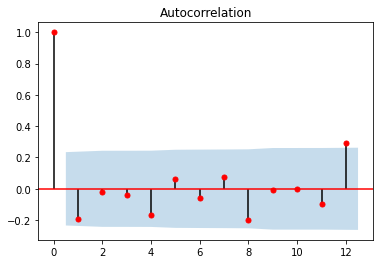

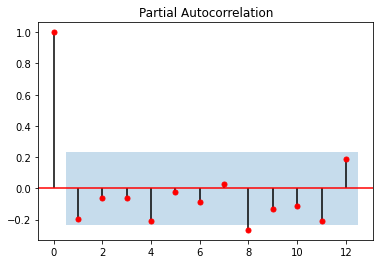

In [ ]:
# Plotting ACF and PACF
plot(res_data_diff)

In [ ]:
# Splitting Data
sep = int(res_data.shape[0]*0.8)

train = res_data[:sep+1]
test = res_data[sep:]

In [ ]:
# Model Building 
model_1 = sm.tsa.statespace.SARIMAX(train,order=(1,1,1),seasonal_order=(1,1,1,12)).fit()

In [ ]:
# Fit Check
fit_check(model_1)

Good model - Proceed for Forecasting


In [ ]:
# Forecasting the Data
pred = model_1.forecast(len(test)+30)

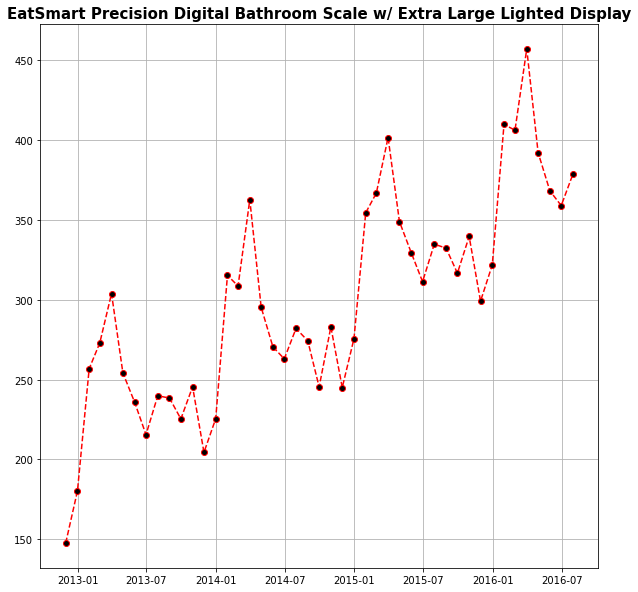

In [ ]:
# Plotting Data
plt.figure(figsize=(10,10))
plt.plot(pred,ls='--',marker='o',mfc='black',color='red')
plt.title('EatSmart Precision Digital Bathroom Scale w/ Extra Large Lighted Display',fontsize=15,fontweight = 'bold')
plt.grid()
plt.show();

## Eatsmart Precision Plus Digital Bathroom Scale with Ultra Wide Platform and Step-on Technology, 440-Pounds

In [ ]:
# Copying Data
df_1 = data.copy()

In [ ]:
# Products which are sold more
df_1.title.value_counts()

EatSmart Precision Digital Bathroom Scale w/ Extra Large Lighted Display, 400 lb. Capacity and &quot;Step-On&quot; Technology [2014 VERSION] - 10,000+ Reviews EatSmart Guaranteed Accurate    11365
Eatsmart Precision Plus Digital Bathroom Scale with Ultra Wide Platform and Step-on Technology, 440-Pounds                                                                                      9338
Fitbit One Wireless Activity Plus Sleep Tracker, Black                                                                                                                                          6788
NatureWise Garcinia Cambogia Extract Natural Appetite Suppressant and Weight Loss Supplement, 180 Count, 500mg (packaging may vary)                                                             5739
Omron HJ-112 Digital Pocket Pedometer                                                                                                                                                           5550
               

In [ ]:
# Mask the Data
mask = (df_1['reviewTime'] > '2008-1-1') & (df_1['reviewTime'] <= '2013-12-31')
df_1 = df_1.loc[mask]

In [ ]:
# Data Filtering
data_1 = df_1.loc[df_1.title == 'Eatsmart Precision Plus Digital Bathroom Scale with Ultra Wide Platform and Step-on Technology, 440-Pounds','title']

In [ ]:
# Resampling the Data
res_data = data_1.resample('M').count()

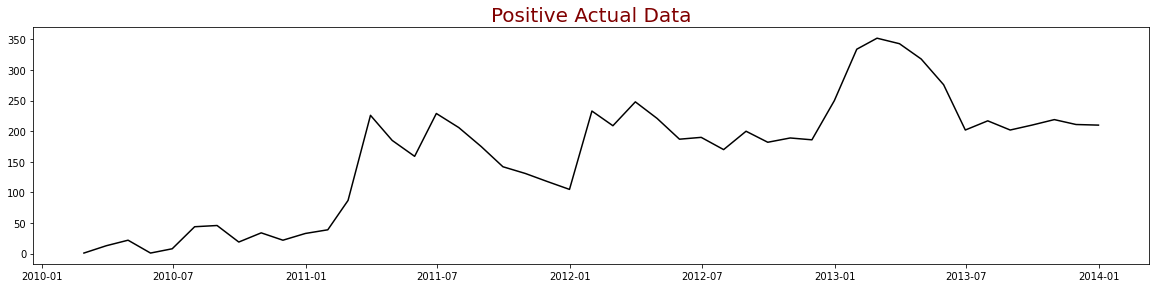

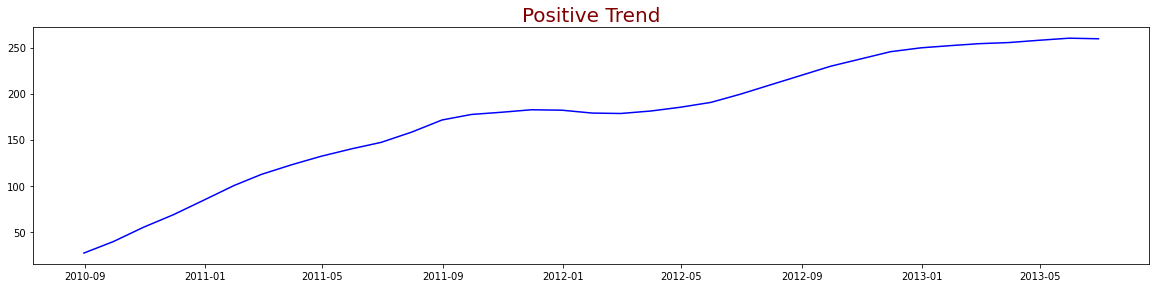

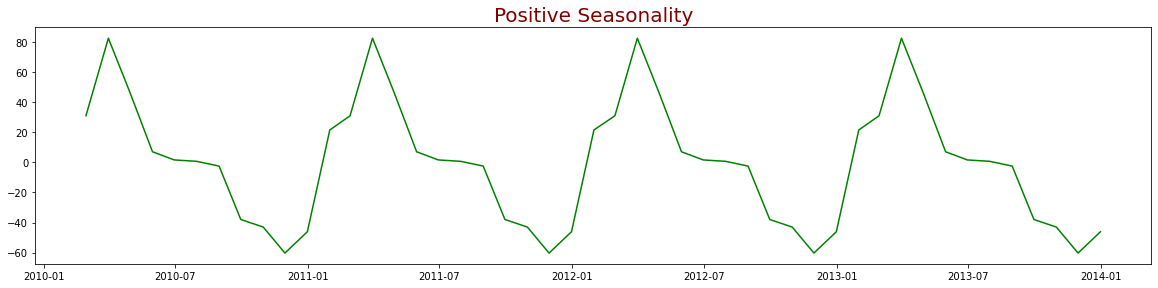

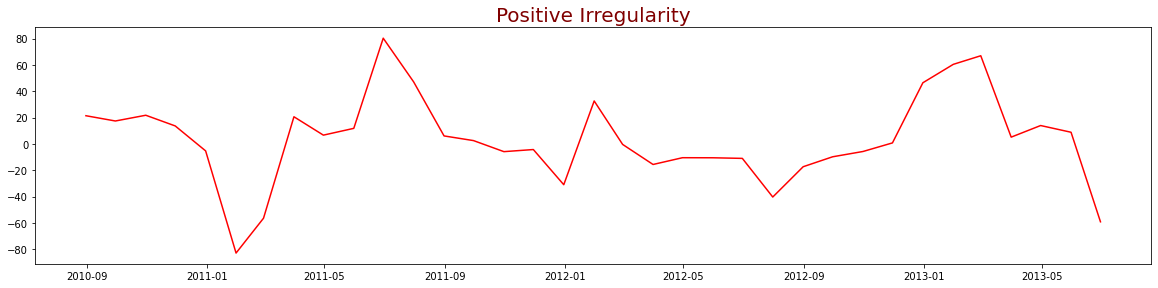

In [ ]:
# Positive Time Series Data Components
trend, season, irreg = time_series_comp(res_data)

plot_comp(res_data,trend,season,irreg,'Positive')
plt.show();

In [ ]:
# Stationary Check
stationarity_check(res_data)

'Model was not Stationary - Take Differenced Data'

In [ ]:
# Differencing Data
res_data_diff = res_data - res_data.shift(1)
res_data_diff.dropna(inplace=True)

In [ ]:
# Stationary Check
stationarity_check(res_data_diff)

'Model was Stationary - Proceed for Model Building'

(<Figure size 432x288 with 1 Axes>, <Figure size 432x288 with 1 Axes>)

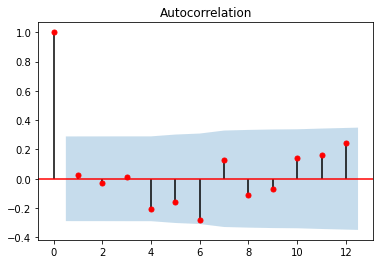

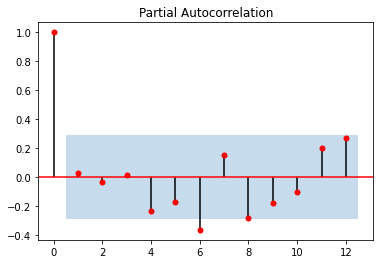

In [ ]:
# Plotting ACF and PACF
plot(res_data_diff)

In [ ]:
# Splitting Data
sep = int(res_data.shape[0]*0.8)

train = res_data[:sep+1]
test = res_data[sep:]

In [ ]:
# Model Building 
model_2 = sm.tsa.statespace.SARIMAX(train,order=(1,1,0),seasonal_order=(1,1,0,12)).fit()

In [ ]:
# Fit Check
fit_check(model_2)

Good model - Proceed for Forecasting


In [ ]:
# Forecasting the Data
pred = model_2.forecast(len(test)+30)

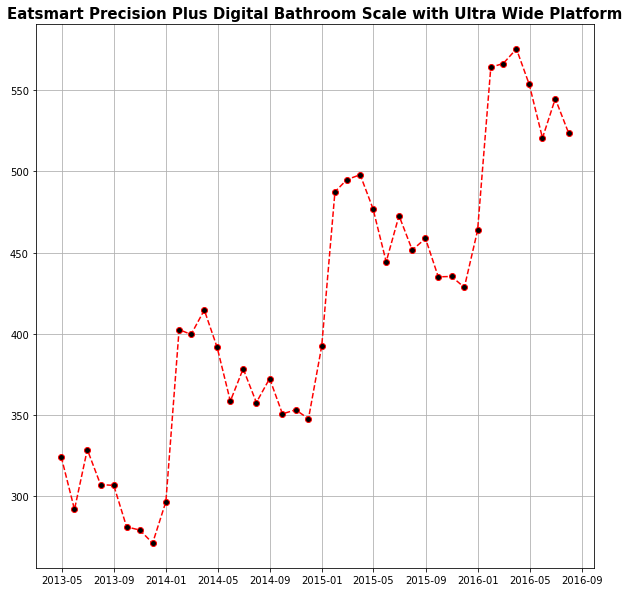

In [ ]:
# Plotting Data
plt.figure(figsize=(10,10))
plt.plot(pred,ls='--',marker='o',mfc='black',color='red')
plt.title('Eatsmart Precision Plus Digital Bathroom Scale with Ultra Wide Platform',fontsize=15,fontweight = 'bold')
plt.grid()
plt.show();